## Raport 1 - Przetwarzanie języka naturalnego

Milena Biernacka 

Informatyka - Data Science

402119

In [2]:
from datasets import load_dataset
import re
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
# loading dataset
dataset = load_dataset("clarin-knext/fiqa-pl", "corpus")
dataset

Found cached dataset fiqa-pl (/Users/milenabiernacka/.cache/huggingface/datasets/clarin-knext___fiqa-pl/corpus/0.0.0/bada00640881ee3fd04c3b88df9edd435616d17e0a46faf05e63063858742140)


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    corpus: Dataset({
        features: ['_id', 'title', 'text'],
        num_rows: 57638
    })
})

In [4]:
df = dataset["corpus"].to_pandas()
df.head()

,_id,title,text
0,3,,"Nie mówię, że nie podoba mi się też pomysł szk..."
1,31,,Tak więc nic nie zapobiega fałszywym ocenom po...
2,56,,Nigdy nie możesz korzystać z FSA dla indywidua...
3,59,,Samsung stworzył LCD i inne technologie płaski...
4,63,,Oto wymagania SEC: Federalne przepisy dotycząc...


In [5]:
# joining all texts in one
fulltext = ' '.join(df['text'])
# fulltext

## zadanie 1

In [6]:
# date and time regexes
hour_pattern = r'\b(?:[01]\d|2[0-3]):[0-5]\d\b'
date_pattern = r'(\b\d{1,4}[-/.](0[1-9]|1[0-2])[-/.](0[1-9]|[12][0-9]|3[01])|(0[1-9]|[12][0-9]|3[01])[-/.](0[1-9]|1[0-2])[-/.]\d{1,4}|\d{1,2}\s(?:stycznia|styczeń|lutego|marca|kwietnia|maja|czerwca|lipca|sierpnia|września|października|listopada|grudnia)\d{0,4}?)\b'

## zadanie 2

### hours

In [37]:
hours = re.findall(hour_pattern, fulltext)
hours[:10]

['17:57',
 '17:57',
 '20:00',
 '17:00',
 '22:00',
 '12:00',
 '17:30',
 '15:00',
 '20:00',
 '12:03']

In [8]:
len(hours)

328

### dates

In [38]:
dates = re.findall(date_pattern, fulltext)
dates = [date[0] for date in dates]
dates[:10]

['1 czerwca',
 '1 sierpnia',
 '1 sierpnia',
 '2017-10-06',
 '2017-10-06',
 '2 kwietnia',
 '30 kwietnia',
 '2017/09/09',
 '2009/07/09',
 '1 grudnia']

In [10]:
len(dates)

2460

## zadanie 3

### hours

In [11]:
# change to full hour
full_hours = [hour.split(':')[0] + ':00' for hour in hours]
full_hours = pd.DataFrame(full_hours)
full_hours.rename(columns ={ 0 : 'hour'}, inplace=True )

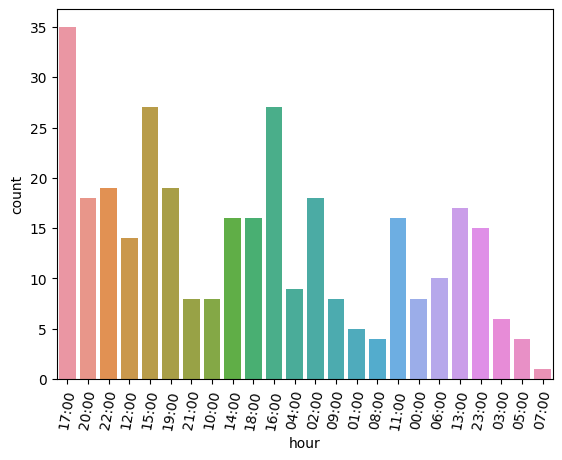

In [13]:
# barplot for hours
sns.countplot(x = 'hour', data = full_hours)
plt.xticks(rotation=80)
plt.show()

### dates

In [14]:
# list with month names in correct form
month_names = [
    "stycznia", "lutego", "marca", "kwietnia", "maja", "czerwca",
    "lipca", "sierpnia", "września", "października" ,"listopada", "grudnia"
]

In [15]:
# list for storing all occurances of months
months_occ_names = []

In [16]:
# counting months in format ex. 20 września 2021, 12 lipca
for date in dates:
    for month in month_names:
        if month in date:
            months_occ_names.append(month)

In [17]:
# counting months in format ex. 10-09-2000, 10/09/2000

months_occ_numbers= []
# retrieving just numeric dates
matches_numeric = re.findall(r'(\b\d{1,4}[-/.](0[1-9]|1[0-2])[-/.](0[1-9]|[12][0-9]|3[01])|(0[1-9]|[12][0-9]|3[01])[-/.](0[1-9]|1[0-2])[-/.]\d{1,4})\b', fulltext)
matches_numeric = [match[0] for match in matches_numeric]

# retrieving just month (as a number) from numeric dates
for date in matches_numeric:
    months_occ_numbers.append(re.split(r'[./-]', date)[1])

#appending main list with month occurances with months from numeric dates
for month in months_occ_numbers:
    months_occ_names.append(month_names[int(month)-1])

In [18]:
# checking if we have all dates
len(months_occ_names) == len(dates)

True

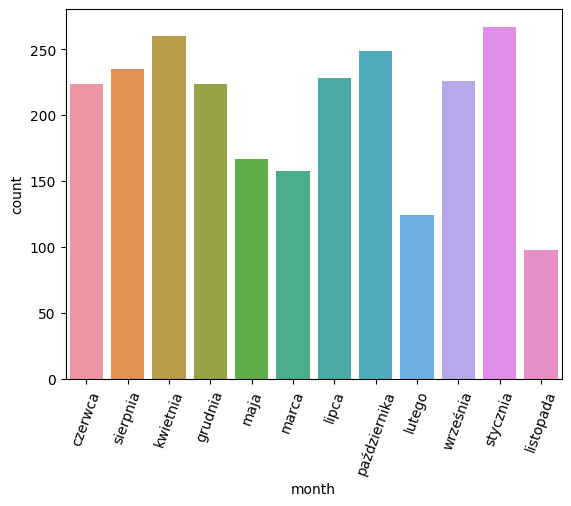

In [19]:
months_occ_names = pd.DataFrame(months_occ_names)
months_occ_names.rename(columns = {0:"month"}, inplace = True)

# dates barplot
sns.countplot(x='month', data = months_occ_names)
plt.xticks(rotation=70)
plt.show()

## 4

In [20]:
styczen_pattern =  r'\bstycz[en][^eyaą][ńiwmauchen]{0,4}\b'

In [21]:
styczens = re.findall(styczen_pattern, fulltext)

In [22]:
# styczens = [item for sublist in styczens if sublist for item in sublist]
styczens = pd.DataFrame(styczens)

In [39]:
styczens.head()

,0
0,stycznie
1,stycznia
2,stycznia
3,stycznia
4,stycznia


In [24]:
len(styczens)

458

In [25]:
styczens[0].unique()

array(['stycznie', 'stycznia', 'styczniem', 'styczeń', 'styczniu'],
      dtype=object)

## 5

In [26]:
styczen_pattern2 =  r'\b\d{1,2} stycz[en][^eyaą][ńiwmauchen]{0,4}\b'

In [27]:
styczens2 = re.findall(styczen_pattern2, fulltext)

In [28]:
styczens2 = pd.DataFrame(styczens2)

In [40]:
styczens2.head()

,0
0,9 stycznia
1,25 stycznia
2,19 stycznia
3,18 stycznia
4,23 stycznia


In [30]:
styczens2[0].unique()

array(['9 stycznia', '25 stycznia', '19 stycznia', '18 stycznia',
       '23 stycznia', '29 stycznia', '17 stycznia', '1 stycznia',
       '31 stycznia', '2 stycznia', '15 stycznia', '12 stycznia',
       '11 stycznia', '4 stycznia', '30 stycznia', '20 stycznia',
       '21 stycznia', '10 stycznia', '5 stycznia', '6 stycznia',
       '8 stycznia', '3 stycznia', '08 stycznia', '13 stycznia',
       '22 stycznia', '24 stycznia', '16 stycznia', '27 stycznia',
       '7 stycznia', '14 stycznia', '26 stycznia'], dtype=object)

In [31]:
# nagative lookbehind
styczen_pattern3 = r'\b(?<![0-9] )stycz[en][^eyaą][ńiwmauchen]{0,4}\b'

In [32]:
styczens3 = re.findall(styczen_pattern3, fulltext)

In [33]:
styczens3 = pd.DataFrame(styczens3)

In [41]:
styczens3.head()

,0
0,stycznie
1,styczniem
2,styczeń
3,stycznia
4,stycznia


In [35]:
styczens3[0].unique()

array(['stycznie', 'styczniem', 'styczeń', 'stycznia', 'styczniu'],
      dtype=object)

In [36]:
(len(styczens2) + len(styczens3)) == len (styczens)

True

## Are regular expressions good at capturing times? Are regular expressions good at capturing dates?


W mojej ocenie powiedziałaby, że to bardzo zależy. Zależy od tego na jakich tekstach pracujemy i przede wszystkim czy wiemy co się w tych tekstach znajduje. Godziny i daty są o tyle specyficznymi elementami do wyszukiwania, że nie ma właściwie jednego uniwersalnego sposobu na ich zapisanie. W każdym kraju, kulturze czy tradycji może się np. daty zapisywać inaczej, czy to zaczynając od dnia, czy to zaczynając od roku. Różnie daje się też znaki rozdzielające w datach: kropki, slashe, pauzy... W tym przypadku znajdowawały się też daty słowne, co dokładało dodatkowych trudności. A czy wspomnienie miesiąca słownie to już data czy tylko "zwykłe" słowo w zdaniu. 
Jeśli chodzi o czas to tutaj też jest podobna sytuacja. Czy ktoś pisze czas z ":" czy z "."? Czy godziny są w formacie 24h czy 12h. Zapewne i wykorzystanie różnych stref czasowych może dołożyć kolejnych trudności. 
W takich przypadkach regexy są dość mocno skomplikowane, trzeba uwzględnić wiele możliwości, zwłaszcza jeśli się chce wyszukiwać jednym wzorcem. 
Tak jak stworzone regexy powyżej przeze mnie i zwrócone przez nich daty i godziny po przejrzeniu "z grubsza" wydają się być okej, to i tak dalej nie mam pewności czy uwzględniłam wszystkie przypadki i czy przypadkiem nie wyszukuje czegoś, co wyglądem przypomina datę czy godzinę, ale tak naprawdę nią nie jest.
Podsumowując: myślę, że regexy byłyby okej, gdybyśmy mieli pewność w jakim formacie data czy godzina będą występować konkretnie i bez wyjątków. Jeśli jednak tego nie wiemy używanie ich może być uciążliwe i lepiej wybrać biblioteki dedykowane do tych rzeczy.

## How one can be sure that the expression has matched all and only the correct expressions of a given type?

Na samym początku dobrze jest zrozumieć dokładnie do czego tak naprawdę potrzebujemy regexa i jakie są możliwe warianty poszukiwanych wyrażeń. Wydaje mi się, że przede wszystkim upewnienie się polega na wielokrotnym testowaniu zbudowanego wzorca. Najpierw sam wzorzec musi być poprawny, żeby wyszukiwał to co faktycznie chcemy znaleźć. Później trzeba sprawdzić czy nie wyszukuje nadmiarowych elementów, może istnieją jakieś "wyjątki"/"specjalne przypadki". Na pewno potrzebna jest do tego też ingerencja człowieka i użycie wiedzy eksperckiej czy po prostu doszukiwanie się błędów, których maszyna nie widzi jako błędy. Do takiego testowania dobrze jest używać już sprawdzonych tekstów, aby jasno było wiadomo czy regex działa okej.